In [2]:
!ls data

data1.txt     data2.txt     data3.txt     data4.txt     separable.txt


In [10]:
# Runs kernel perceptron on a 2-d data set and displays the results
%pylab inline
import numpy as np
import matplotlib.pyplot as pl

Populating the interactive namespace from numpy and matplotlib


/Users/yoavfreund/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['load', 'dot', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
def quadk(x,z):
    """ compute quadratic kernel function """
    tmp = 1.0 + np.dot(x,z)
    return tmp*tmp

def rbfk(x,z,sigma=1.0):
    """ RBF krnel Function """
    tmp = np.linalg.norm(x-z)/sigma
    return np.exp(-tmp*tmp)

def dot(x,y):
    return 1.0+np.dot(x,y)

In [12]:
def load(datafile):
    data = np.loadtxt(datafile)
    print 'loaded %s, shape=%s'%(datafile,data.shape)
    x = data[:,0:2]
    y = data[:,2]
    return x,y

loaded data/separable.txt, shape=(30, 3)


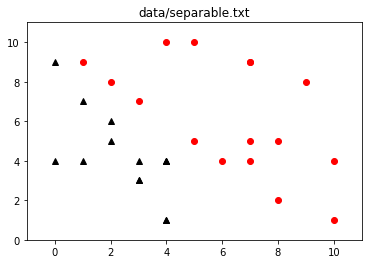

In [13]:
# Load in a 2-d data set. Labels are +1/-1 and each line is a single
# data point, of the form: x1 x2 y

def plot(x,y,title):
    xmin = min(x[:,0]) - 1
    xmax = max(x[:,0]) + 1
    ymin = min(x[:,1]) - 1
    ymax = max(x[:,1]) + 1
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
    plt.title(title)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

datafile='data/separable.txt'
x,y=load(datafile)
plot(x,y,datafile)

In [14]:
def evaluate(alpha,x,y,x0,kernel):
    """ Evaluate an SVM (alpha,x,y) on a new point x0 using a given kernel """
    value = 0.0
    for i in range(len(alpha)):
        if alpha[i] > 0:
            value = value + alpha[i] * y[i] * kernel(x[i,:],x0)
    return np.sign(value)

def Train_perceptron(x,y,kernel):
    """ Train a perceptron using input vecctors x, output label y and a kernel"""
    working = True
    n=len(y)
    alpha = np.zeros(n)
    errors=0
    _iter=0
    examples=0
    np.random.seed(None)
    while working:
        working = False
        _iter+=1
        I = np.random.permutation(n)
        for i in range(n):
            examples+=1
            j = I[i]
            if (evaluate(alpha,x,y,x[j,:],kernel) != y[j]):
                working = True
                alpha[j] = alpha[j] + 1
                errors+=1
                yield alpha,j,examples,errors,_iter
#Train_perceptron(x,y,quadk)

In [15]:
def plot_state(x,y,alpha,kernel,title):  
    # compute bounding box
    xmin = min(x[:,0]) - 1
    xmax = max(x[:,0]) + 1
    ymin = min(x[:,1]) - 1
    ymax = max(x[:,1]) + 1

    delta = 0.05
    xx, yy = np.meshgrid(np.arange(xmin, xmax, delta), np.arange(ymin, ymax, delta))
    grid = np.c_[xx.ravel(), yy.ravel()]
    gn, gp = grid.shape
    Z = np.zeros(gn)
    for i in range(gn):
        Z[i] = evaluate(alpha,x,y,grid[i,:],kernel)
    fig = plt.figure()
    ax = plt.subplot(111)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)

    # Identify the support vectors
    sv = (alpha > 0)
    notsv = np.logical_not(sv)

    #print 'shapes: x=',x.shape,'y=',y.shape,'notsv=',notsv.shape,'sv=',sv.shape
    # Plot also the training points
    plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
    plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
    plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
    plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    return fig

In [30]:
x,y=load('data/separable.txt')
i=0
_err_list=[]
_iter_list=[]
_plots=[]
seq_dir='image_sequence'
!rm -rf $seq_dir
!mkdir $seq_dir

loaded data/separable.txt, shape=(30, 3)


50 20 109 45 4 plotting
100 20 218 95 8 plotting
111 9 244 106 9  


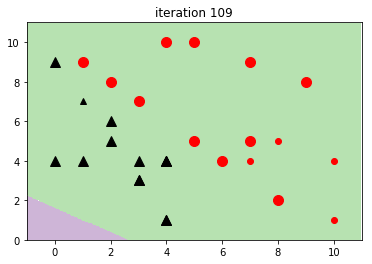

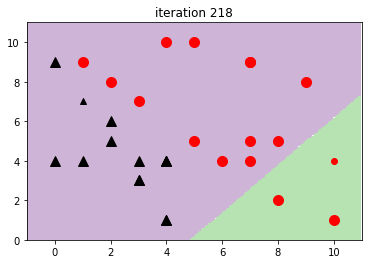

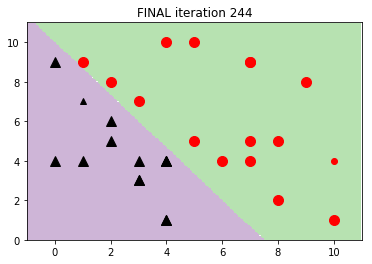

In [38]:
c=1;
for alpha,j,examples,errors,_iter in Train_perceptron(x,y,dot):
    i+=1
    _err_list.append(errors)
    _iter_list.append(_iter)
    print '\r',i,j,examples,errors,_iter,
    if i%50==0:
        fig=plot_state(x,y,alpha,dot,'iteration %d'%examples)
        fig.savefig(seq_dir+'/frame%d.png'%c)
        print 'plotting'
        c+=1
  
fig=plot_state(x,y,alpha,dot,'FINAL iteration %d'%examples)
fig.savefig(seq_dir+'/frame%d.png'%c)
#plt.show()


In [57]:
from IPython.display import Image
i=0

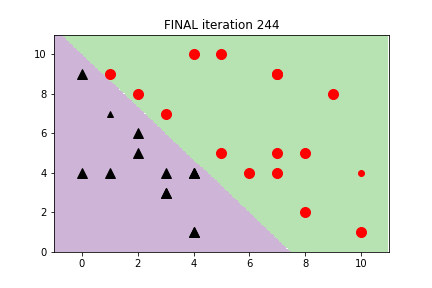

In [60]:
i+=1
Image(filename=seq_dir+'/frame%d.png'%i)

In [177]:
!ls -l myplot.pkl

-rw-r--r--  1 yoavfreund  staff  8482582 Jul 25 22:22 myplot.pkl


In [160]:
%matplotlib notebook
with open('myplot.pkl','rb') as fid:
    ax = pickle.load(fid)
plt.show?


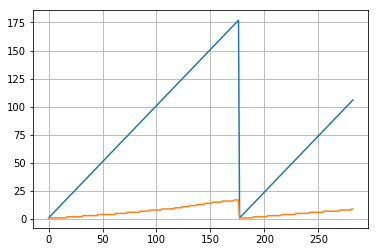

In [61]:
plt.plot(_err_list)
plt.plot(_iter_list)
plt.grid()